# Homework 5 

Student: Justin Yu

Student Number: 1006747111

In [7]:
# import packages
import pandas as pd
import pymc as pm
import numpy as np
import arviz as az
import matplotlib.pyplot as plt;
from scipy import stats
import pymc as pm
import numpy as np

**Part 1:**

In [260]:
data = pd.read_csv('housing.csv')
data = data.dropna()
data = data.sample(1000)

In [261]:
X = data[["housing_median_age", "total_rooms", "total_bedrooms","median_house_value"]]
Y = data[["median_income"]]
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17409,-120.57,34.96,27.0,1401.0,294.0,1306.0,286.0,2.5809,83200.0,NEAR OCEAN
5351,-118.40,34.04,40.0,2079.0,268.0,720.0,282.0,9.2720,500001.0,<1H OCEAN
8781,-118.32,33.79,32.0,2381.0,467.0,1264.0,488.0,4.1477,315100.0,<1H OCEAN
1584,-121.96,37.84,29.0,7479.0,977.0,2744.0,943.0,7.5139,398200.0,INLAND
7450,-118.18,33.94,43.0,2724.0,612.0,2340.0,570.0,2.7000,165000.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
20353,-119.05,34.13,12.0,57.0,22.0,69.0,15.0,5.0066,275000.0,NEAR OCEAN
16312,-121.33,38.00,32.0,4474.0,929.0,2177.0,884.0,3.2889,98900.0,INLAND
13349,-117.64,34.02,10.0,4887.0,930.0,2637.0,831.0,4.0611,158000.0,INLAND
78,-122.29,37.81,23.0,1745.0,374.0,1054.0,325.0,0.8026,112500.0,NEAR BAY


In [262]:
def standardize_data(X):
    # Standardize Data
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_std = (X - mean) / std
    return X_std

In [263]:
X_STD = standardize_data(X)
Y_STD = standardize_data(np.log(Y))

In [269]:
X_STD

,housing_median_age,total_rooms,total_bedrooms,median_house_value
17409,-0.139223,-0.643318,-0.610586,-1.077428
5351,0.911214,-0.261741,-0.681719,2.503478
8781,0.264791,-0.091776,-0.137274,0.914919
1584,0.022382,2.777372,1.258038,1.628864
7450,1.153623,0.101264,0.259432,-0.374651
...,...,...,...,...
20353,-1.351267,-1.399720,-1.354752,0.570403
16312,0.264791,1.086162,1.126715,-0.942543
13349,-1.512873,1.318598,1.129450,-0.434791
78,-0.462435,-0.449716,-0.391713,-0.825700


In [266]:
p = 4
with pm.Model() as MLR:
    betas = pm.MvNormal('betas', mu=np.zeros((p,1)), cov=np.eye(p), shape=(p,1))
    sigma = pm.TruncatedNormal('sigma', mu=0.4, sigma=1, lower=0) # half normal
    y = pm.Normal('y', mu=pm.math.dot(X_STD, betas), sigma=sigma, observed=Y_STD)

with MLR:
    idata = pm.sample(chains=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [betas, sigma]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 3474 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


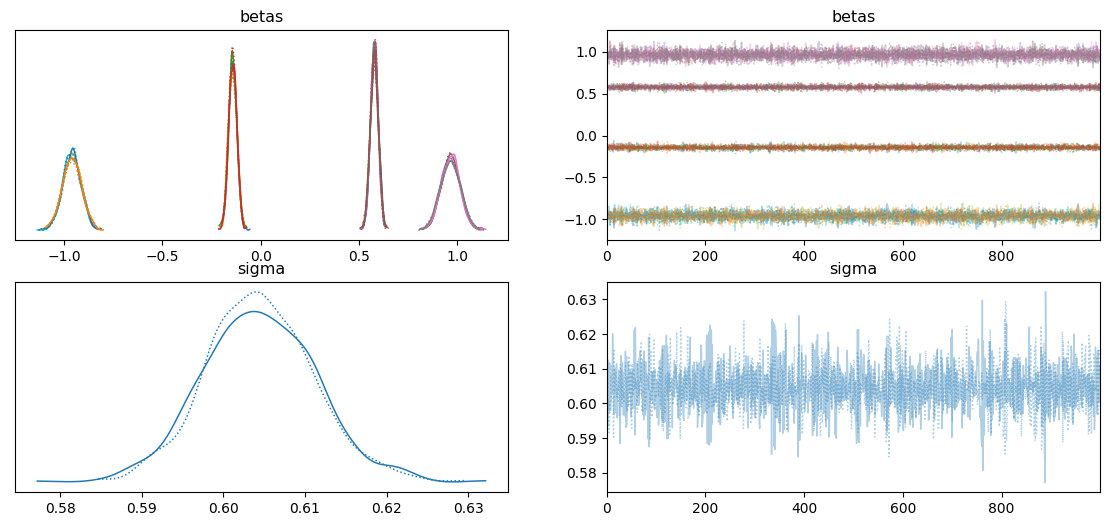

In [267]:
fig,ax = plt.subplots(2,2, figsize=(14,6))
az.plot_trace(idata, axes=ax);

In [268]:
az.summary(idata, round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
"betas[0, 0]",-0.14,0.02,-0.18,-0.10,0.0,0.0,4063.48,1365.74,1.0
"betas[0, 1]",-0.14,0.02,-0.18,-0.10,0.0,0.0,4164.48,1189.39,1.0
"betas[0, 2]",-0.14,0.02,-0.18,-0.10,0.0,0.0,3785.77,1616.27,1.0
"betas[0, 3]",-0.14,0.02,-0.18,-0.10,0.0,0.0,3348.66,1353.68,1.0
"betas[1, 0]",0.97,0.05,0.88,1.06,0.0,0.0,2084.21,1583.28,1.0
"betas[1, 1]",0.97,0.05,0.88,1.06,0.0,0.0,2048.00,1528.84,1.0
"betas[1, 2]",0.97,0.05,0.87,1.06,0.0,0.0,1941.87,1551.86,1.0
"betas[1, 3]",0.97,0.05,0.87,1.06,0.0,0.0,2017.78,1522.33,1.0
"betas[2, 0]",-0.96,0.05,-1.05,-0.87,0.0,0.0,2286.89,1568.04,1.0
"betas[2, 1]",-0.96,0.05,-1.05,-0.88,0.0,0.0,2342.67,1632.96,1.0


In [264]:
import statsmodels.api as sm
mod = sm.OLS(Y_STD, X_STD).fit()
mod.scale

0.36541956091432143

In [265]:
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          median_income   R-squared (uncentered):                   0.636
Model:                            OLS   Adj. R-squared (uncentered):              0.635
Method:                 Least Squares   F-statistic:                              435.1
Date:                Tue, 27 Feb 2024   Prob (F-statistic):                   8.05e-217
Time:                        03:58:27   Log-Likelihood:                         -913.58
No. Observations:                1000   AIC:                                      1835.
Df Residuals:                     996   BIC:                                      1855.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
housing_median_age    -0.1420      0.021     -6.804      0.000      -0.183      -0.101
total_rooms            0.9708      0.050     19.248      0.000       0.872       1.070
total_bedrooms        -0.9649      0.048    -19.901      0.000      -1.060      -0.870
median_house_value     0.5779      0.020     28.720      0.000       0.538       0.617
==============================================================================
Omnibus:                      115.811   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              255.390
Skew:                          -0.673   Prob(JB):                     3.49e-56
Kurtosis:                       5.077   Cond. No.                         5.22
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,median_income
0,1.858786
1,1.852703
2,1.567130
3,1.032566
4,0.218044
...,...
20635,-1.698929
20636,-0.649557
20637,-1.516731
20638,-1.317404


In [157]:
# Check for NaN values
nan_mask = Y_STD.isna()

# Print the rows containing NaN values
nan_rows = Y_STD[nan_mask.any(axis=1)]
nan_rows

,median_income


In [171]:
filt = Y_STD["median_income"].isin([np.inf, -np.inf])
Y_STD["median_income"][filt]

Series([], Name: median_income, dtype: float64)

In [140]:
np.shape(np.array(Y))

(20640, 1)

**Part 2:**